In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load aggregated results
agg_df = pd.read_csv("./analysis_data/aggregate_metrics.csv")

df = agg_df[agg_df["k"] <= 250]

k = df["k"].values



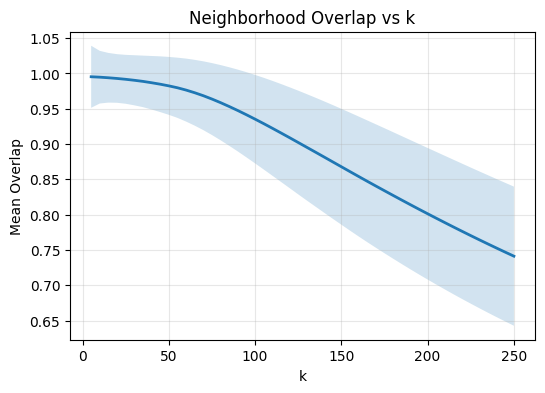

In [2]:
plt.figure(figsize=(6,4))
plt.plot(k, df["mean_overlap"], linewidth=2)
plt.fill_between(
    k,
    df["mean_overlap"] - df["std_overlap"],
    df["mean_overlap"] + df["std_overlap"],
    alpha=0.2
)
plt.xlabel("k")
plt.ylabel("Mean Overlap")
plt.title("Neighborhood Overlap vs k")
plt.grid(alpha=0.3)
plt.show()


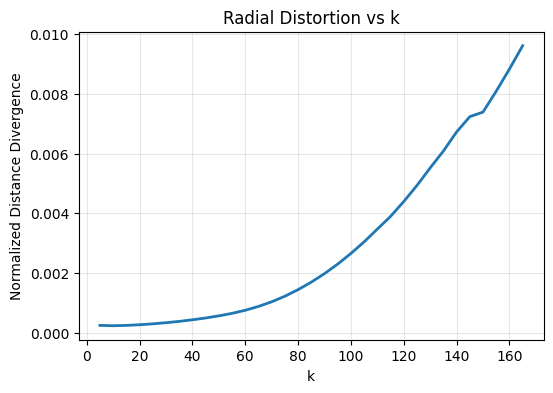

In [3]:
mask = np.isfinite(df["mean_dist_divergence"])

plt.figure(figsize=(6,4))
plt.plot(k[mask], df.loc[mask, "mean_dist_divergence"], linewidth=2)
plt.xlabel("k")
plt.ylabel("Normalized Distance Divergence")
plt.title("Radial Distortion vs k")
plt.grid(alpha=0.3)
plt.show()


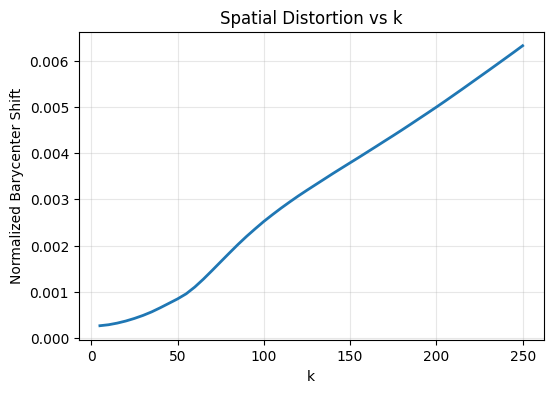

In [4]:
plt.figure(figsize=(6,4))
plt.plot(k, df["mean_barycenter_shift"], linewidth=2)
plt.xlabel("k")
plt.ylabel("Normalized Barycenter Shift")
plt.title("Spatial Distortion vs k")
plt.grid(alpha=0.3)
plt.show()


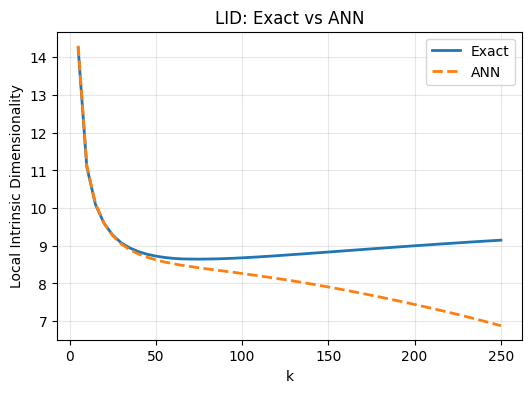

In [5]:
plt.figure(figsize=(6,4))
plt.plot(k, df["lid_exact"], label="Exact", linewidth=2)
plt.plot(k, df["lid_ann"], "--", label="ANN", linewidth=2)
plt.xlabel("k")
plt.ylabel("Local Intrinsic Dimensionality")
plt.title("LID: Exact vs ANN")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


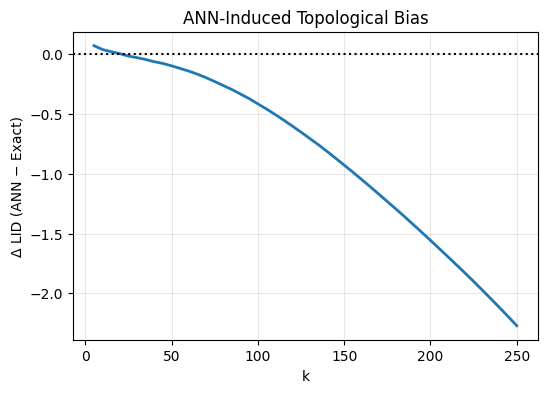

In [6]:
plt.figure(figsize=(6,4))
plt.plot(k, df["lid_ann"] - df["lid_exact"], linewidth=2)
plt.axhline(0, linestyle=":", color="black")
plt.xlabel("k")
plt.ylabel("Δ LID (ANN − Exact)")
plt.title("ANN-Induced Topological Bias")
plt.grid(alpha=0.3)
plt.show()


In [7]:
def first_derivative(y, x):
    return np.gradient(y, x)


In [8]:
import numpy as np

def rate_of_change(y, x):
    """
    Compute dy/dx using finite differences.
    Handles non-uniform spacing in x.
    """
    y = np.asarray(y, dtype=float)
    x = np.asarray(x, dtype=float)

    finite = np.isfinite(y)
    y = y[finite]
    x = x[finite]

    return x, np.gradient(y, x)

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_rate_of_change(
    df,
    metric,
    ylabel=None,
    smooth=True,
    window=9,
    polyorder=2,
):
    k = df["k"].values
    y = df[metric].values

    k_d, dy = rate_of_change(y, k)

    plt.figure(figsize=(6,4))

    # Raw derivative (faint)
    plt.plot(
        k_d,
        dy,
        alpha=0.3,
        linewidth=1,
        label="Raw"
    )

    # Smoothed derivative
    if smooth and len(dy) >= window:
        dy_smooth = savgol_filter(
            dy,
            window_length=window,
            polyorder=polyorder
        )
        plt.plot(
            k_d,
            dy_smooth,
            linewidth=2.5,
            label="Smoothed"
        )

    plt.axhline(0, linestyle=":", color="black", alpha=0.7)
    plt.xlabel("k")
    plt.ylabel(ylabel or f"d({metric}) / dk")
    plt.title(f"Rate of Change of {metric}")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()



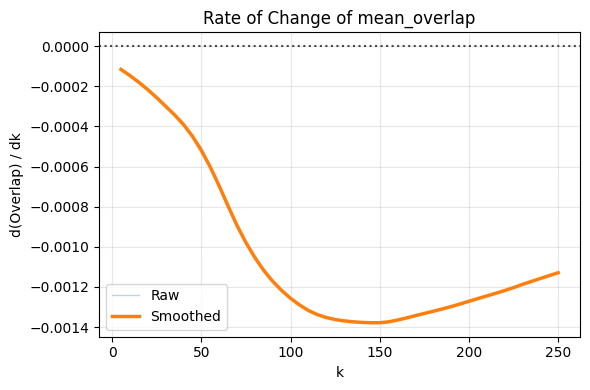

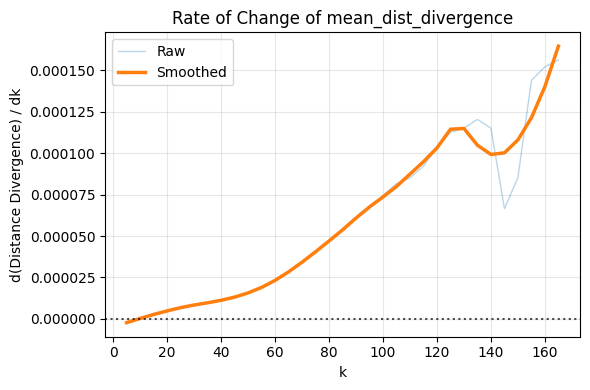

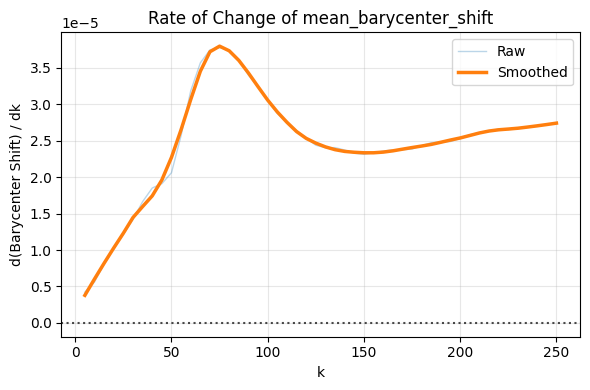

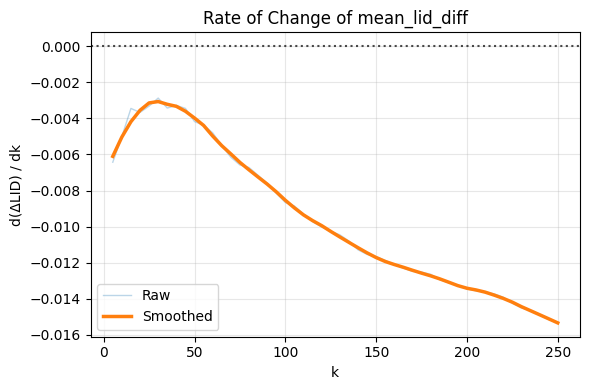

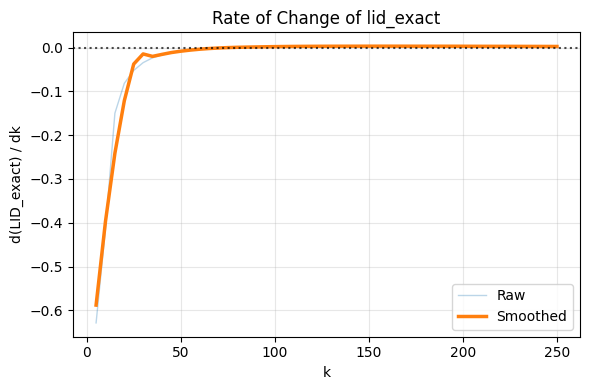

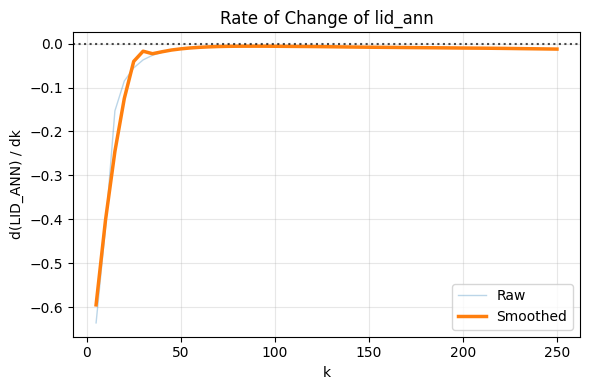

In [9]:
metrics = {
    "mean_overlap": "d(Overlap) / dk",
    "mean_dist_divergence": "d(Distance Divergence) / dk",
    "mean_barycenter_shift": "d(Barycenter Shift) / dk",
    "mean_lid_diff": "d(ΔLID) / dk",
    "lid_exact": "d(LID_exact) / dk",
    "lid_ann": "d(LID_ANN) / dk",
}

for m, label in metrics.items():
    plot_rate_of_change(df, m, label)


Minimal set for the paper (my recommendation)

If reviewers force you to trim:

Keep

Overlap vs k

Barycenter shift vs k

LID Exact vs ANN

ΔLID vs k

Optional (appendix)

Distance divergence

First derivative of LID